In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

In [4]:
train_data_path = './train.csv'
test_data_path = './test.csv'
train_data = pd.read_csv(train_data_path, delimiter=",")
test_data = pd.read_csv(test_data_path, delimiter=",")
#all_data = pd.concat([train_data, test_data])

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task 3. Questions

## How many passengers was travelling by first class?

In [5]:
print "First class passengers number =", len(train_data.groupby('Pclass').get_group(1))

First class passengers number = 216


## How does ticket cost varie?

In [6]:
print "Max cost =", np.amax(train_data.Fare)

Max cost = 512.3292


In [7]:
print "Min cost =", np.amin(train_data.Fare)

Min cost = 0.0


In [8]:
print "Mean cost =", np.mean(train_data.Fare)

Mean cost = 32.2042079686


In [10]:
print "Median of a cost =", np.median(train_data.Fare)

Median of a cost = 14.4542


In [11]:
print "Standart deviation of a cost =", np.std(train_data.Fare)

Standart deviation of a cost = 49.6655344448


## What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

There are a full set of titles of people aboard:

In [6]:
print "Titles =", np.unique(map(lambda x: x.split(",")[1].split(".")[0][1:], train_data.Name))

Titles = ['Capt' 'Col' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss' 'Mlle'
 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']


The plot below is showing the distribution of titles between ticket classes

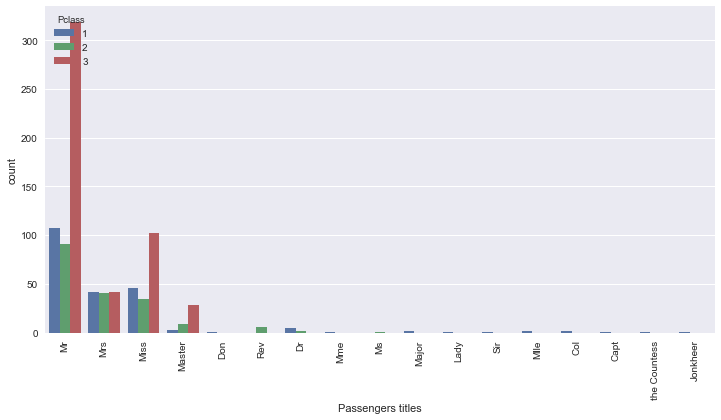

In [13]:
w_title = train_data.copy()
w_title.Name = map(lambda x: x.split(",")[1].split(".")[0][1:], train_data.Name)

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)


p = sns.countplot(x="Name", hue="Pclass", data=w_title, ax=ax)
p.set(xlabel='Passengers titles', ylabel='count')
_ = plt.setp(p.get_xticklabels(), rotation=90)


The same plot in numerical form:

In [8]:
w_title.groupby(["Name", "Pclass"]).size()

Name          Pclass
Capt          1           1
Col           1           2
Don           1           1
Dr            1           5
              2           2
Jonkheer      1           1
Lady          1           1
Major         1           2
Master        1           3
              2           9
              3          28
Miss          1          46
              2          34
              3         102
Mlle          1           2
Mme           1           1
Mr            1         107
              2          91
              3         319
Mrs           1          42
              2          41
              3          42
Ms            2           1
Rev           2           6
Sir           1           1
the Countess  1           1
dtype: int64

## What is the most popular female name on board?

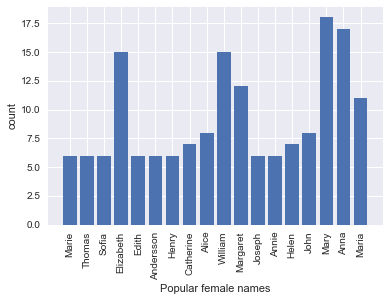

In [33]:
def remove_marks(name):
    puncts = [",", ".", "(", ")"]
    remove = lambda str, substr: str.replace(substr, '')
    for x in puncts:
        name = remove(name, x) # remove punctuational marks
    return name

def parse_name(name):
    titles = w_title.Name
    name = remove_marks(name)
    name_list = name.split(' ')
    for x in titles:
        try: name_list.remove(x) # remove titles
        except: None
    return name_list # return list of names of one person

names = train_data.groupby('Sex').get_group('female').Name.copy() # get all female's full names
names = map(lambda x: parse_name(x), names)
names = np.hstack(names) # list of all women names

unique, counts = np.unique(names, return_counts=True)
names_dict = dict(zip(unique, counts))
names_dict = {k: v for k, v in names_dict.iteritems() if v > 5} # remove names which count is less than 5 from stats

fig, ax = plt.subplots()
ax.bar(range(len(names_dict)), names_dict.values(), align='center')
#p.set(xlabel='Passengers titles', ylabel='count')
ax.set_xlabel('Popular female names')
ax.set_ylabel('count')
plt.xticks(range(len(names_dict)), names_dict.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


Look's like "Mary" was the most popular female name aboard, even without summing it with variations (Maria and Marie).

## Are there any dependencies between class and ticket number?

After manually looking at the data, some correlation of ticket class number and it's first digit in the numerical part was found, for example:

In [10]:
train_data.loc[[2]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


This passenger ticket class (3) is equal to her ticket number first digit (3 in 3101282). Let's try to support the correlation with statistics:

In [11]:
def try_parse_ticket_number(value):
    try:
        return str(int(value))[0] # return first digit of ticket number
    except ValueError:
        return 0

def parse_ticket(str):
    split = str.split(' ')
    if (len(split) > 1):
        substr = split[len(split) - 1]
        return try_parse_ticket_number(substr)
    return try_parse_ticket_number(str)

train_ = train_data.copy()
train_.Ticket = map(lambda x: parse_ticket(x), train_.Ticket)
train_[["Pclass", 'Ticket']]

len(train_[train_.Pclass == map(lambda x: int(x), train_.Ticket)]) / float(len(train_.index))

0.7384960718294051

So for about 74% tickets first digit in numeral part of ticket number is equal for it's class number

## What part of passengers was able to survive?

In [12]:
len(train_[train_.Survived == 1]) / float(len(train_.index))

0.3838383838383838

~38% of passengers was able to survive

## Are there any correlation between the number of brothers/sisters and the number of parents/kids ?

Let's look at the correlation matrix firstly:

In [36]:
corrmat = train_data.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


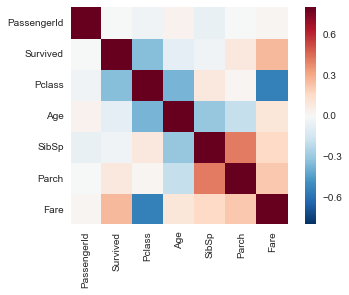

In [37]:
sns.heatmap(corrmat, vmax=.8, square=True)

As we can see, correlation coefficient between siblings and parches is quite high. So we can assume that there is some kind of connection between them.

Let's try some educated guesses:

In [14]:
print len(train_data[(train_data.SibSp != 0) & (train_data.Parch != 0)]) / float(len(train_data[(train_data.Parch != 0)]))

0.666666666667


There is ~67% probability that if a passenger has a parch aboard then he has a sibling aboard either.

In [15]:
print len(train_data[(train_data.SibSp == 0) & (train_data.Parch == 0)]) / float(len(train_data[(train_data.SibSp == 0)]))

0.883223684211


There is ~88% probability that if a passenger doesn't have a sibling aboard then he doesn't have a parch aboard neither.

In [16]:
print len(train_data[(train_data.SibSp == 0) & (train_data.Parch == 0)]) / float(len(train_data[(train_data.Parch == 0)]))

0.79203539823


There is ~79% probability that if a passenger doesn't have a parch aboard then he doesn't have a sibling aboard neither.

# Task 4. Correlations search

Let's try to find correlation between age and survival probability:

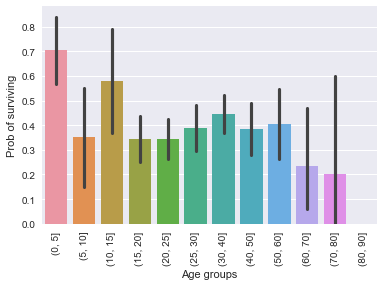

In [28]:
age_groups = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
train_data["AgeG"] = pd.cut(train_data["Age"].fillna(-1), bins=age_groups).astype(object)
order = []

for i in range(len(age_groups) - 1):
    order.append('({}, {}]'.format(age_groups[i], age_groups[i+1]))
p = sns.barplot(x="AgeG", y="Survived", data=train_data, order=order)
p.set(xlabel='Age groups', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

The graph above is showing how a survival rate depends on an age group. As we can see from the graph, children from 0 to 5 years have the highest survival rate and the lowest one in the elder age groups. Now let's split groups by gender and ticket class also:

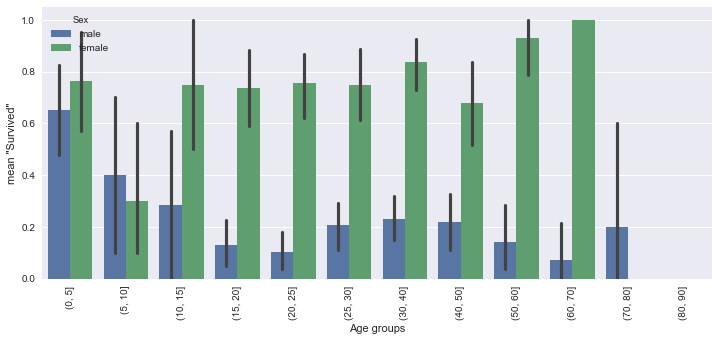

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

p = sns.barplot(x="AgeG", y="Survived", hue='Sex', data=train_data, order=order, ax=ax)
p.set(xlabel='Age groups', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

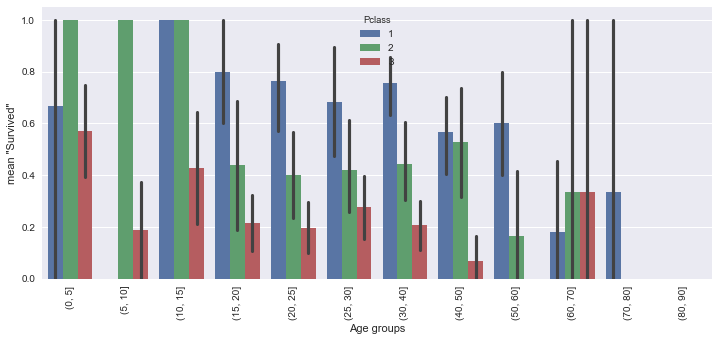

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

p = sns.barplot(x="AgeG", y="Survived", hue='Pclass', data=train_data, order=order, ax=ax)
p.set(xlabel='Age groups', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

From the plots above the correlations between survival rate and ticket class/gender are clearly visible. We can also try the same plot with titles:

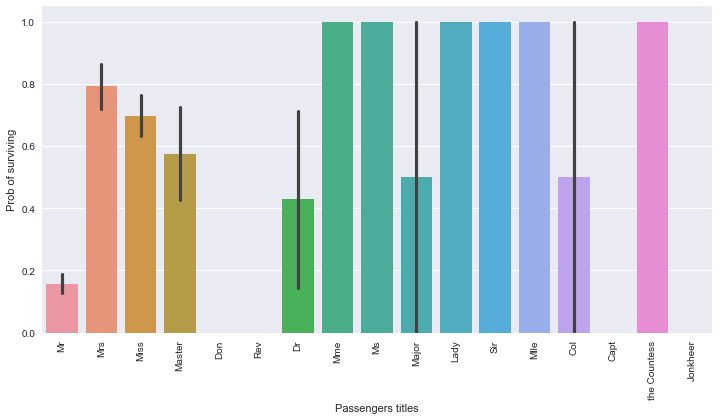

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

p = sns.barplot(x="Name", y="Survived", data=w_title, ax=ax)
p.set(xlabel='Passengers titles', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

But it's not too helpful due to not representative datasets for most titles (numbers are below). Nevertheless, it's possible to get some interesting facts. Like, all of the churchmen (Rev = Reverend) didn't manage to survive.

In [21]:
w_title.groupby(["Name"])["Survived"].size()

Name
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

# Task 5. Assumptions check

## Females survived more frequently than males

There is a plot showing mean "Survived" value for both genders:

[<matplotlib.text.Text at 0x10ea70150>, <matplotlib.text.Text at 0x10eb5d150>]

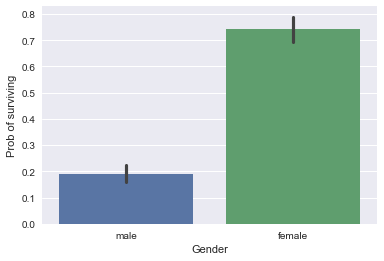

In [25]:
p = sns.barplot(x="Sex", y="Survived", data=train_data)
p.set(xlabel='Gender', ylabel='Prob of surviving')

As we can see, female's surviving rate is much greater than male's one.

## Passengers with more expensive tickets survived with higher probability

There is a plot which is very similar to previous one but splitted by ticket classes:

[<matplotlib.text.Text at 0x10f138850>, <matplotlib.text.Text at 0x10f5dec90>]

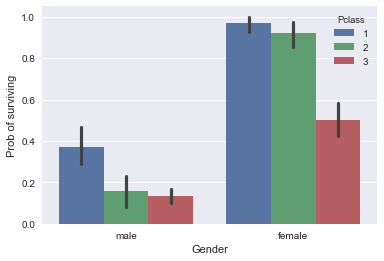

In [26]:
p = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_data)
p.set(xlabel='Gender', ylabel='Prob of surviving')

And numerical form:

In [24]:
print train_data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


Now it's obvious that passengers with more expensive tickets survived with higher probability